#Simple Moving Average (SMA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

File ‘sp500_close.csv’ already there; not retrieving.



In [ ]:
close = pd.read_csv('/content/sp500_close.csv', index_col = 0, parse_dates = True)

In [ ]:
close.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [ ]:
goog = close[['GOOG']].copy().dropna()

In [ ]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


<Axes: >

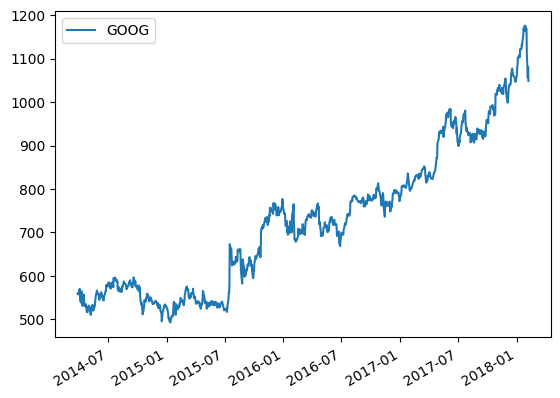

In [ ]:
goog.plot()

In [ ]:
goog_ret = np.log(goog.pct_change(1)+1)

<Axes: >

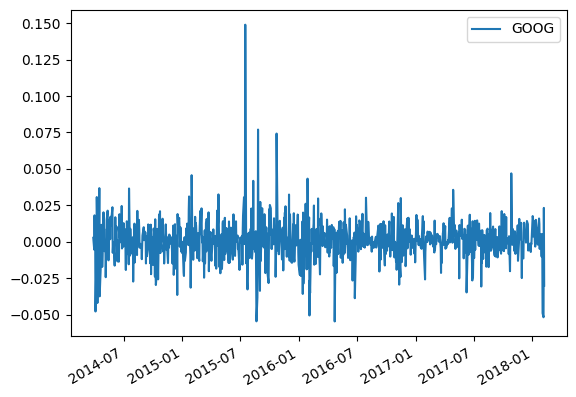

In [ ]:
goog_ret.plot()

In [ ]:
#Rolling mea with window 10
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(15)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


In [ ]:
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

<Axes: >

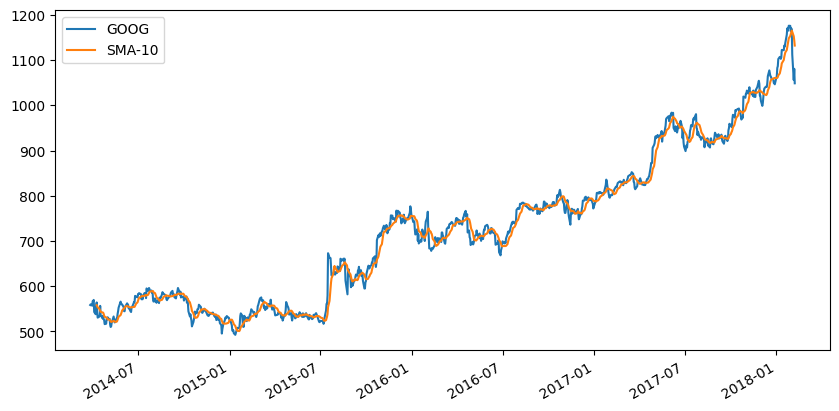

In [ ]:
goog.plot(figsize=(10,5))

<Axes: >

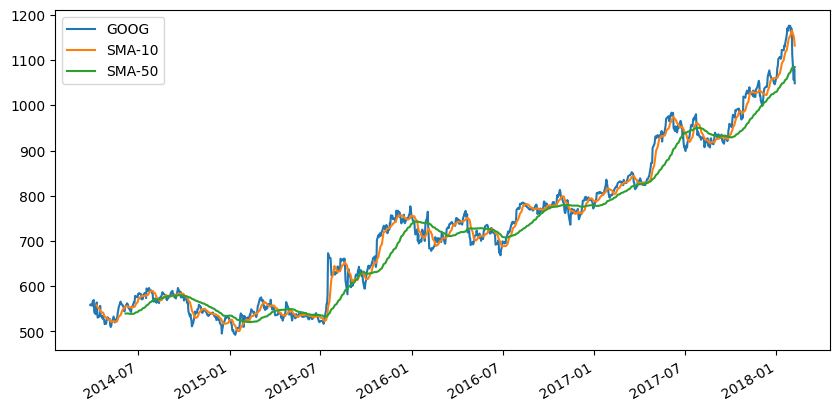

In [ ]:
#More values you use more smoother the curve is
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog.plot(figsize=(10,5))

In [ ]:
goog_aapl = close[['GOOG','AAPL']].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [ ]:
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [ ]:
#Log Returns
goog_aapl_ret = np.log(1 + goog_aapl.pct_change(1))
goog_aapl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [ ]:
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

<Axes: >

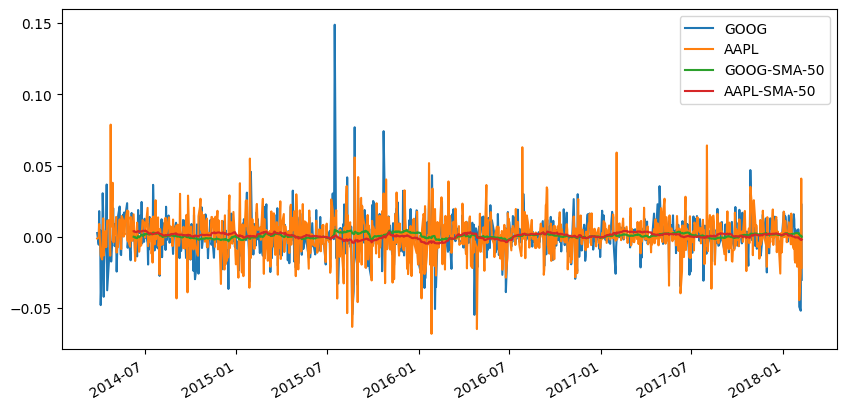

In [ ]:
goog_aapl_ret.plot(figsize=(10,5))

In [ ]:
cov = goog_aapl_ret[['GOOG-SMA-50','AAPL-SMA-50']].rolling(50).cov()
cov.tail()

GOOG-SMA-50   AAPL-SMA-50
2018-02-05 AAPL-SMA-50 -7.715772e-08  1.188405e-06
2018-02-06 GOOG-SMA-50  2.852362e-07 -1.882949e-08
           AAPL-SMA-50 -1.882949e-08  1.329746e-06
2018-02-07 GOOG-SMA-50  3.430702e-07  8.238184e-08
           AAPL-SMA-50  8.238184e-08  1.506869e-06

In [ ]:
corr = goog_aapl_ret[['GOOG-SMA-50','AAPL-SMA-50']].rolling(50).corr()
corr.tail(20)

GOOG-SMA-50  AAPL-SMA-50
2018-01-25 GOOG-SMA-50     1.000000    -0.210844
           AAPL-SMA-50    -0.210844     1.000000
2018-01-26 GOOG-SMA-50     1.000000    -0.291214
           AAPL-SMA-50    -0.291214     1.000000
2018-01-29 GOOG-SMA-50     1.000000    -0.353417
           AAPL-SMA-50    -0.353417     1.000000
2018-01-30 GOOG-SMA-50     1.000000    -0.397767
           AAPL-SMA-50    -0.397767     1.000000
2018-01-31 GOOG-SMA-50     1.000000    -0.426551
           AAPL-SMA-50    -0.426551     1.000000
2018-02-01 GOOG-SMA-50     1.000000    -0.462629
           AAPL-SMA-50    -0.462629     1.000000
2018-02-02 GOOG-SMA-50     1.000000    -0.406629
           AAPL-SMA-50    -0.406629     1.000000
2018-02-05 GOOG-SMA-50     1.000000    -0.138433
           AAPL-SMA-50    -0.138433     1.000000
2018-02-06 GOOG-SMA-50     1.000000    -0.030574
           AAPL-SMA-50    -0.030574     1.000000
2018-02-07 GOOG-SMA-50     1.000000     0.114578
           AAPL-SMA-50     0.114578     1.000000

#Exponentially-Weighted Moving Average - EWMA

Other names: Exponential smoothing and low-pass filter

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [ ]:
df = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.isna().sum()

Passengers    0
dtype: int64

<Axes: xlabel='Month'>

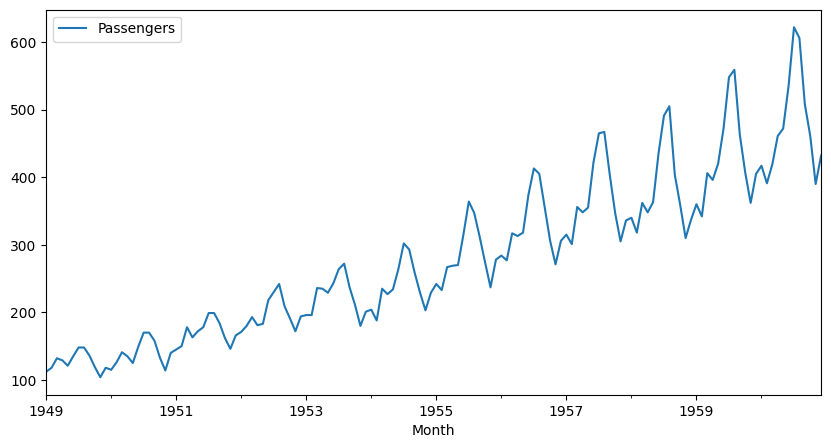

In [ ]:
df.plot(figsize=(10,5))

In [ ]:
alpha = 0.2

In [ ]:
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [ ]:
type(df['EWMA'].ewm(alpha=alpha,adjust=False))

pandas.core.window.ewm.ExponentialMovingWindow

<Axes: xlabel='Month'>

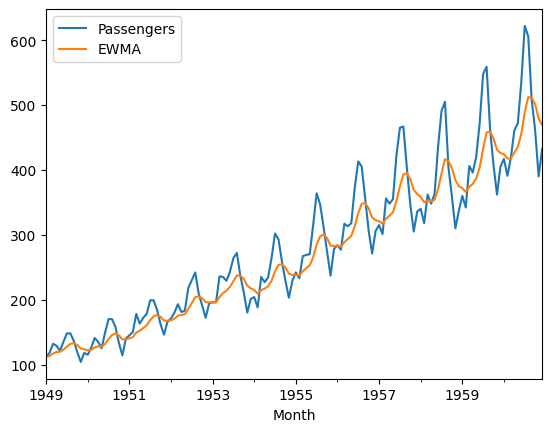

In [ ]:
df.plot()

In [ ]:
manual_ewma=[]
for x in df['Passengers'].to_numpy():
  if len(manual_ewma)>0:
    xhat = alpha * x + (1 - alpha) * manual_ewma [-1]
  else:
    xhat = x
  manual_ewma.append(xhat)
df['Manual'] = manual_ewma

<Axes: xlabel='Month'>

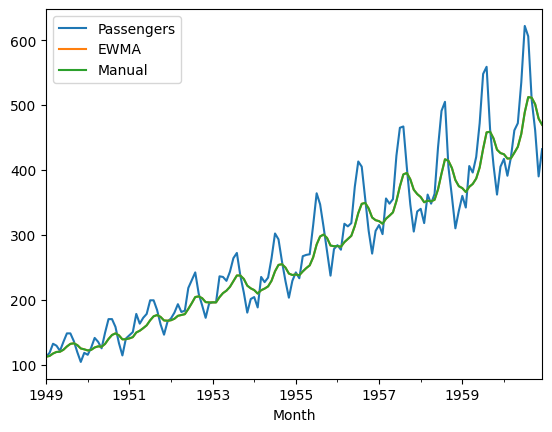

In [ ]:
df.plot()

In [ ]:
df.head()


,Passengers,EWMA,Manual
Month,,,
1949-01-01,112,112.0000,112.0000
1949-02-01,118,113.2000,113.2000
1949-03-01,132,116.9600,116.9600
1949-04-01,129,119.3680,119.3680
1949-05-01,121,119.6944,119.6944


In [ ]:
df.drop('Manual',axis=1, inplace=True)

#Simple Exponential Smoothing (SES) - Non-trending and non-seazonal

A fórmula básica do SES é:

**Ft+1 =α⋅Yt +(1-α)⋅Ft**

Onde:

Ft+1 é a previsão para o próximo período,

Yt é a observação atual,

Ft é a previsão anterior,

α é o fator de suavização (0 < α < 1).

In [ ]:
!pip install -U statsmodels

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
ses = SimpleExpSmoothing(df['Passengers'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
df.index.freq ='MS' #Months

In [ ]:
ses = SimpleExpSmoothing (df['Passengers'], initialization_method ='legacy-heuristic' )

In [ ]:
res = ses.fit(smoothing_level = alpha, optimized = False)

In [ ]:
res

In [ ]:
df['SES'] = res.predict(start=df.index[0], end=df.index[-1])

In [ ]:
np.allclose(df['SES'], res.fittedvalues)

True

<Axes: xlabel='Month'>

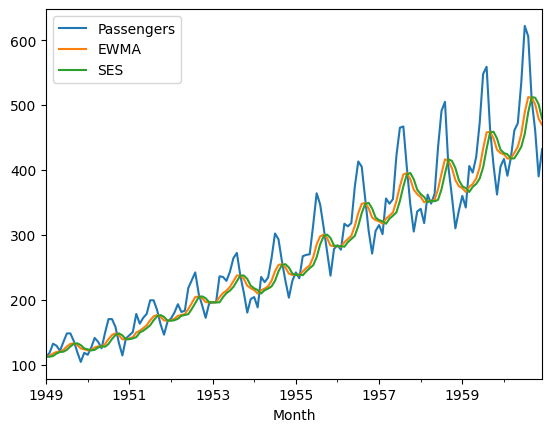

In [ ]:
df.plot()

In [ ]:
df.head()

,Passengers,EWMA,SES
Month,,,
1949-01-01,112,112.0000,112.000
1949-02-01,118,113.2000,112.000
1949-03-01,132,116.9600,113.200
1949-04-01,129,119.3680,116.960
1949-05-01,121,119.6944,119.368


In [ ]:
df['SES-1']= df['SES'].shift(-1) # This is wrong!!!

<Axes: xlabel='Month'>

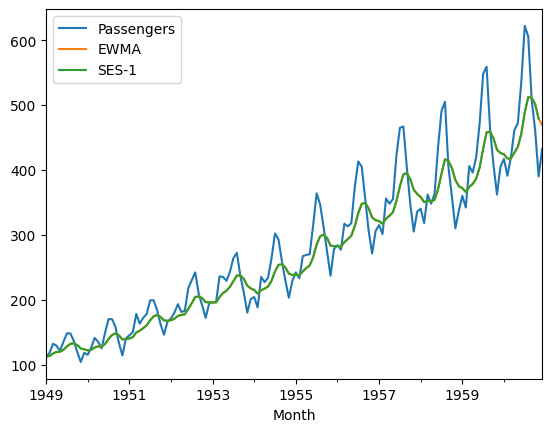

In [ ]:
##NO!! Do not do this!!!

df[["Passengers", "EWMA", "SES-1"]].plot()

In [ ]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [ ]:
ses = SimpleExpSmoothing(
    train['Passengers'],

    initialization_method = 'legacy-heuristic')
res = ses.fit()

In [ ]:
#Boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]


<Axes: xlabel='Month'>

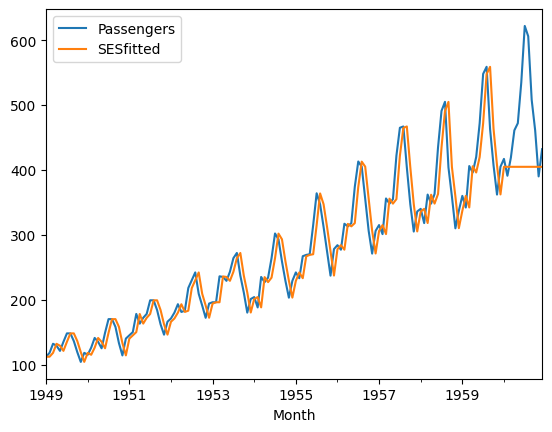

In [ ]:
df.loc[train_idx, 'SESfitted'] = res.fittedvalues
df.loc[test_idx, 'SESfitted'] = res.forecast(N_test)
df[['Passengers','SESfitted']].plot()

In [ ]:
res.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

#Holt Model - Trending but non-seazonal

O modelo de Holt para tendência linear (também conhecido como Holt Linear Trend Model) é uma extensão do método de suavização exponencial simples (SES). O modelo de Holt incorpora uma componente de tendência linear à suavização exponencial.

O modelo pode ser descrito por três equações principais:

1. **Equação do Nível (l_t):**
   
   ***l_t = alpha. Y_t + (1 - alpha) . (l_t-1 + b_t-1)***\
   Onde:
   - \(l_t\) é o nível (componente de suavização exponencial para a média),
   - \(Y_t\) é a observação atual,
   - \(alpha) é o fator de suavização (0 < \(\alpha\) < 1),
   - \(l_t-1\) é o nível anterior,
   - \(b_t-1\) é a inclinação anterior.

2. **Equação da Inclinação \(b_t\):**
   
   ***b_t = beta.(l_t - l_t-1) + (1 - beta) . b_t-1***\
   Onde:
   - \(b_t\) é a inclinação (componente de suavização exponencial para a tendência),
   - \(beta\) é o fator de suavização para a inclinação (0 < \(beta\) < 1).

3. **Equação de Previsão \(F_t+h\):**

   ***F_t+h = l_t + h . b_t***\
   Onde:
   - \(F_t+h\) é a previsão para \(h\) períodos à frente.

Essas equações descrevem como o modelo de Holt atualiza o nível \(l_t\) e a inclinação \(b_t\) ao longo do tempo com base nas observações passadas. O modelo de Holt Linear Trend Model é mais flexível do que o SES porque leva em consideração tanto a suavização exponencial para a média quanto para a tendência linear.

A equação do nível \(l_t\) é a componente de suavização exponencial para a média (semelhante à SES), e a equação da inclinação \(b_t\) é a componente de suavização exponencial para a tendência. A previsão é feita combinando o nível e a inclinação. Portanto, o modelo de Holt é uma extensão do SES que incorpora uma tendência linear, tornando-o mais adequado para séries temporais com tendências lineares.

In [ ]:
from statsmodels.tsa.holtwinters import Holt

In [ ]:
holt = Holt(df['Passengers'], initialization_method = 'legacy-heuristic')

In [ ]:
res_h= holt.fit()

In [ ]:
df['Holt']= res_h.fittedvalues

<Axes: xlabel='Month'>

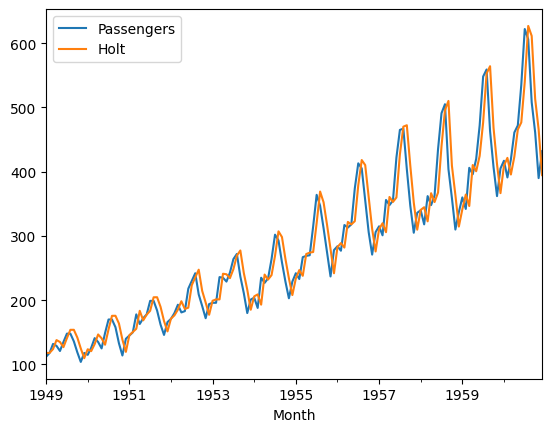

In [ ]:
df[['Passengers','Holt']].plot()

In [ ]:
holt = Holt(train['Passengers'], initialization_method='legacy-heuristic')
res_h = holt.fit()
df.loc[train_idx, 'Holt'] = res_h.fittedvalues

In [ ]:
df.loc[test_idx,'Holt']= res_h.forecast(N_test)

<Axes: xlabel='Month'>

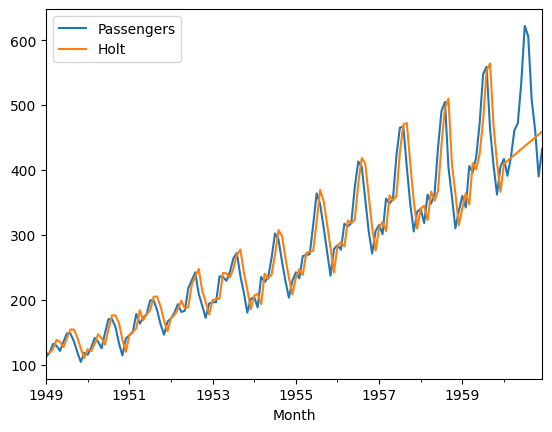

In [ ]:
df[['Passengers','Holt']].plot()

# Holt Winters Model - Trend and Seazonal

O Holt-Winters é uma extensão do Holt Linear Trend Model que incorpora a componente sazonal. Ambos os modelos compartilham a ideia de considerar tanto a suavização exponencial para a média quanto a suavização exponencial para a tendência, mas a principal diferença reside na inclusão da sazonalidade no Holt-Winters.

Vamos abordar brevemente as principais características de ambos:

1. **Holt Linear Trend Model (Holt Linear):**
   - Modelo que considera a suavização exponencial para a média e a tendência linear.
   - Equação do nível \(l_t\):
   
   **l_t = alpha . Y_t + (1 - alpha) .(l_t-1 + b_t-1)**

   - Equação da inclinação \(b_t\):
  
   **b_t = beta . (l_t - l_t-1) + (1 - beta) . b_t-1**

   - Equação de previsão (F_t+h\):
   
   **F_t+h = l_t + h . b_t**
   - Não inclui componente sazonal.

2. **Holt-Winters (Linear Trend and Seasonality):**
   - Modelo mais avançado que inclui suavização exponencial para a média, suavização exponencial para a tendência e suavização exponencial para a componente sazonal.
   - Além das equações do nível \(l_t\) e da inclinação \(b_t\), o Holt-Winters incorpora uma equação para a sazonalidade \(s_t\).
   - Equação do nível \(l_t\):
   Mesma que no Holt Linear.
   - Equação da inclinação \(b_t\):
   Mesma que no Holt Linear.
   - Equação da sazonalidade \(s_t\):
   
   **s_t = gamma.Y_t - l_t-1 - b_t-1 + (1 - gamma) . s_t-m**
   - Equação de previsão \(F_t+h\):
   
   **F_t+h = (l_t + h . b_t) . s_t-m+h**
   - \(m\) representa a periodicidade da sazonalidade.

A inclusão da componente sazonal no Holt-Winters permite que o modelo capture padrões recorrentes em uma série temporal que ocorrem em intervalos regulares. Portanto, se sua série temporal exibir sazonalidade, o Holt-Winters pode ser mais apropriado do que o Holt Linear Trend Model.

Em resumo, enquanto ambos os modelos incluem suavização exponencial para a média e a tendência, o Holt-Winters estende isso para incorporar a sazonalidade, proporcionando uma abordagem mais completa para modelar séries temporais com padrões sazonais.

 **Holt-Winters (Aditivo e Multiplicativo):**
   - Os métodos de Holt-Winters são mais avançados, pois incluem duas componentes (tendência e sazonalidade) além da suavização exponencial para a média. A forma aditiva e multiplicativa difere na maneira como essas componentes são combinadas.
   - Holt-Winters aditivo:
     
     **Y_t+h = l_t + h . b_t + s_t-m+h**
   - Holt-Winters multiplicativo:

     **Y_t+h = (l_t + h . b_t) . s_t-m+h**
   - Ambos os métodos consideram níveis de suavização exponencial para a média \(l_t\), inclinação \(b_t\), e sazonalidade \(s_t\).



In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
hw = ExponentialSmoothing(train['Passengers'], initialization_method='legacy-heuristic', trend='add', seasonal='add', seasonal_periods=12)

In [ ]:
res_hw = hw.fit()

In [ ]:
df.loc[train_idx,'HoltWinters'] = res_hw.fittedvalues

In [ ]:
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

<Axes: xlabel='Month'>

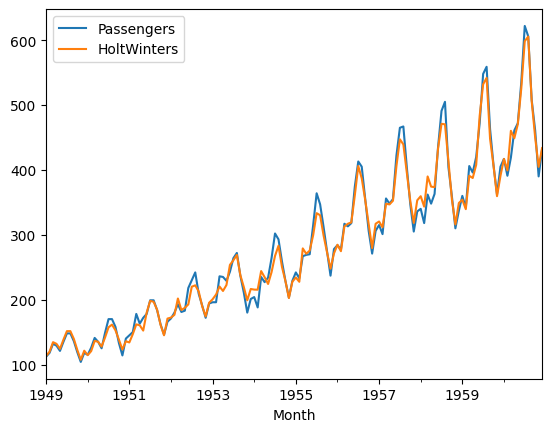

In [ ]:
df[['Passengers','HoltWinters']].plot()

In [ ]:
def rmse (y,t):
  return np.sqrt(np.mean((y-t)**2))

In [ ]:
def mae (y,t):
  return np.mean(np.abs(y-t))

In [ ]:
print('Train RMSE:', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE:', rmse(test['Passengers'], res_hw.forecast(N_test)))
print('Train MAE:', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MAE:', mae(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 11.853000976828765
Test RMSE: 15.543003084126884
Train MAE: 8.892127530485896
Test MAE: 10.43776563928059


In [ ]:
#Melhor modelo até agora

<Axes: xlabel='Month'>

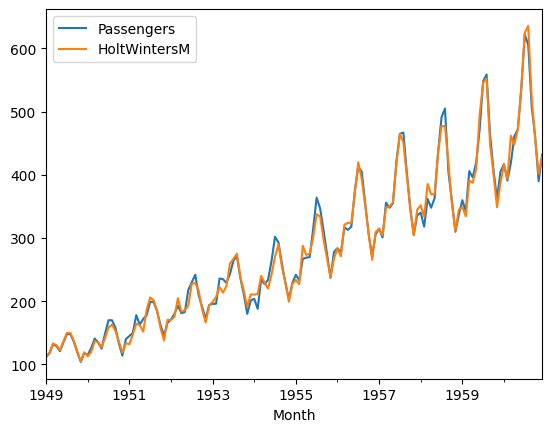

In [ ]:
hw = ExponentialSmoothing(train['Passengers'],
                          initialization_method='legacy-heuristic',
                          trend='add', seasonal='mul', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx,'HoltWintersM'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWintersM'] = res_hw.forecast(N_test)
df[['Passengers','HoltWintersM']].plot()

In [ ]:
print('Train RMSE:', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE:', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE: 10.153934838980392
Test RMSE: 16.535212108255575


In [ ]:
print('Train MAE:', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MAE:', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MAE: 7.552052605073941
Test MAE: 10.683341165983848


<Axes: xlabel='Month'>

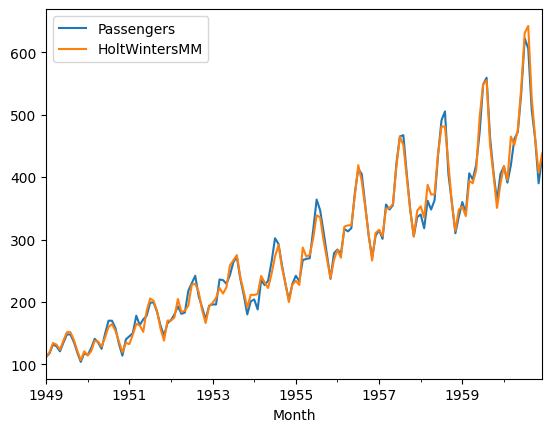

In [ ]:
hw = ExponentialSmoothing(train['Passengers'],
                          initialization_method='legacy-heuristic',
                          trend='mul', seasonal='mul', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx,'HoltWintersMM'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWintersMM'] = res_hw.forecast(N_test)
df[['Passengers','HoltWintersMM']].plot()

In [ ]:
print('Train RMSE:', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE:', rmse(test['Passengers'], res_hw.forecast(N_test)))
print('Train MAE:', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MAE:', mae(test['Passengers'], res_hw.forecast(N_test)))

#Overfits the trainning data

Train RMSE: 9.887178133858725
Test RMSE: 19.102067803628128
Train MAE: 7.4087084537494965
Test MAE: 13.450486213258506


#Walk-Forward Validation


A validação walk-forward é um método iterativo na modelagem preditiva. O modelo é treinado até um ponto específico e testado com dados subsequentes. Após a avaliação, o modelo é ajustado para incluir novos dados, repetindo o processo. Essa abordagem simula um ambiente dinâmico, proporcionando uma avaliação contínua do desempenho do modelo ao longo do tempo, sendo particularmente útil em previsões de séries temporais.

In [ ]:
import itertools
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/airline_passengers.csv', index_col= 'Month', parse_dates=True)

In [ ]:
df.index.freq = 'MS' #set to months

In [ ]:
df.shape

(144, 1)

In [ ]:
#Assume the forecast horizon we care about is 12
#Validate over 10 steps
h = 12
steps = 10
Ntest = len(df)-h-steps+1 # infact validation period

In [ ]:
#Configuration hyperparameters to try
trend_type_list = ['add','mul']
seasonal_type_list = ['add','mul']
damped_trend_list = [True, False]
init_method_list = ['estimated','heuristic','legacy-heuristic']
use_boxcox_list = [True,False, 0]

In [ ]:
def walkforward(
    trend_type,
    seasonal_type,
    damped_trend,
    init_method,
    use_boxcox,
    debug=False):
  #store errors
  errors =[]
  seen_last = False
  steps_completed =0

  for end_of_train in range(Ntest,len(df)-h+1):
    #we dont have to manually add the data to our dataset
    #just index it at the right points - this is a view not a copy
    #so it doesnt take up any extra space or computation
    train = df.iloc[:end_of_train]
    test = df.iloc[end_of_train:end_of_train+h]

    if test.index[-1] == df.index[-1]:
      seen_last = True

    steps_completed += 1

    hw = ExponentialSmoothing(train['Passengers'],
                              initialization_method = init_method,
                              trend = trend_type,
                              damped_trend = damped_trend,
                              seasonal = seasonal_type,
                              seasonal_periods=12,
                              use_boxcox= use_boxcox)
    res_hw = hw.fit()

    #compute error for the forescast horizon

    fcast=res_hw.forecast(h)
    error=mean_squared_error(test['Passengers'],fcast)
    errors.append(error)

  if debug:
      print("seen_last:",seen_last)
      print('steps_completed:', steps_completed)

  return np.mean(errors)





In [ ]:
#test our function
walkforward('add','add',False,'legacy-heuristic',0,debug=True)

seen_last: True
steps_completed: 10


1448.5344452151644

In [ ]:
#iterate throught all possible options (i.e. grid search)

tuple_of_option_lists = (
    trend_type_list,
    seasonal_type_list,
    damped_trend_list,
    init_method_list,
    use_boxcox_list
)
for x in itertools.product(*tuple_of_option_lists):
  print(x)

('add', 'add', True, 'estimated', True)
('add', 'add', True, 'estimated', False)
('add', 'add', True, 'estimated', 0)
('add', 'add', True, 'heuristic', True)
('add', 'add', True, 'heuristic', False)
('add', 'add', True, 'heuristic', 0)
('add', 'add', True, 'legacy-heuristic', True)
('add', 'add', True, 'legacy-heuristic', False)
('add', 'add', True, 'legacy-heuristic', 0)
('add', 'add', False, 'estimated', True)
('add', 'add', False, 'estimated', False)
('add', 'add', False, 'estimated', 0)
('add', 'add', False, 'heuristic', True)
('add', 'add', False, 'heuristic', False)
('add', 'add', False, 'heuristic', 0)
('add', 'add', False, 'legacy-heuristic', True)
('add', 'add', False, 'legacy-heuristic', False)
('add', 'add', False, 'legacy-heuristic', 0)
('add', 'mul', True, 'estimated', True)
('add', 'mul', True, 'estimated', False)
('add', 'mul', True, 'estimated', 0)
('add', 'mul', True, 'heuristic', True)
('add', 'mul', True, 'heuristic', False)
('add', 'mul', True, 'heuristic', 0)
('add

In [ ]:
best_score = float('inf')
best_options = None
for x in itertools.product(*tuple_of_option_lists):
  score = (walkforward(*x))

  if score < best_score:
    print("Best score so far:", score)
    best_score = score
    best_options = x



Best score so far: 412.8172974447663


KeyboardInterrupt: ignored

In [ ]:
print('best score:', best_score)

trend_type, seasonal_type, damped_trend, init_method, use_boxcox = best_options
print('trend_type', trend_type)
print('seasonal_type', seasonal_type)
print('damped_trend', damped_trend)
print('init_method', init_method)
print('use_boxcox', use_boxcox)


#Sales Data

##First Model

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

File ‘perrin-freres-monthly-champagne.csv’ already there; not retrieving.



In [ ]:
df= pd.read_csv('/content/perrin-freres-monthly-champagne.csv', index_col= 'Month', skipfooter=2, parse_dates=True )

<ipython-input-88-52f12d5683ab>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df= pd.read_csv('/content/perrin-freres-monthly-champagne.csv', index_col= 'Month', skipfooter=2, parse_dates=True )


In [ ]:
df.index.freq = 'MS' #set to months

In [ ]:
df.shape

(105, 1)

In [ ]:
df.tail()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


In [ ]:
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'Sales'}, inplace=True)

<Axes: xlabel='Month'>

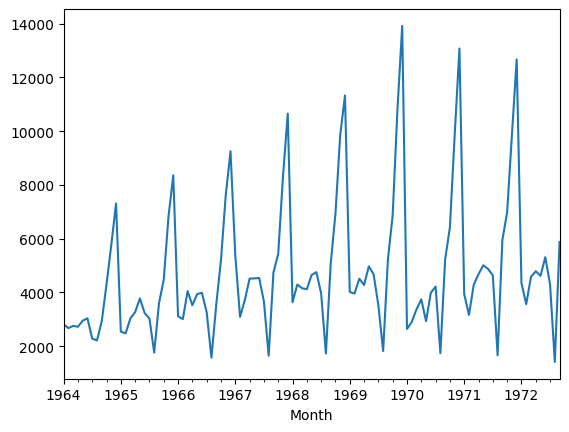

In [ ]:
df['Sales'].plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [ ]:
#Sepaarate train and test
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [ ]:
#Boolean
train_idx = df.index <= train.index[-1]
test_idx = df.index <= test.index[-1]

In [ ]:
#import ExponentialSmoothing

In [ ]:
hw = ExponentialSmoothing(train['Sales'], initialization_method = 'legacy-heuristic',trend='add',seasonal='add',seasonal_periods=12)
res_hw = hw.fit()

In [ ]:
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

In [ ]:
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest)

<Axes: xlabel='Month'>

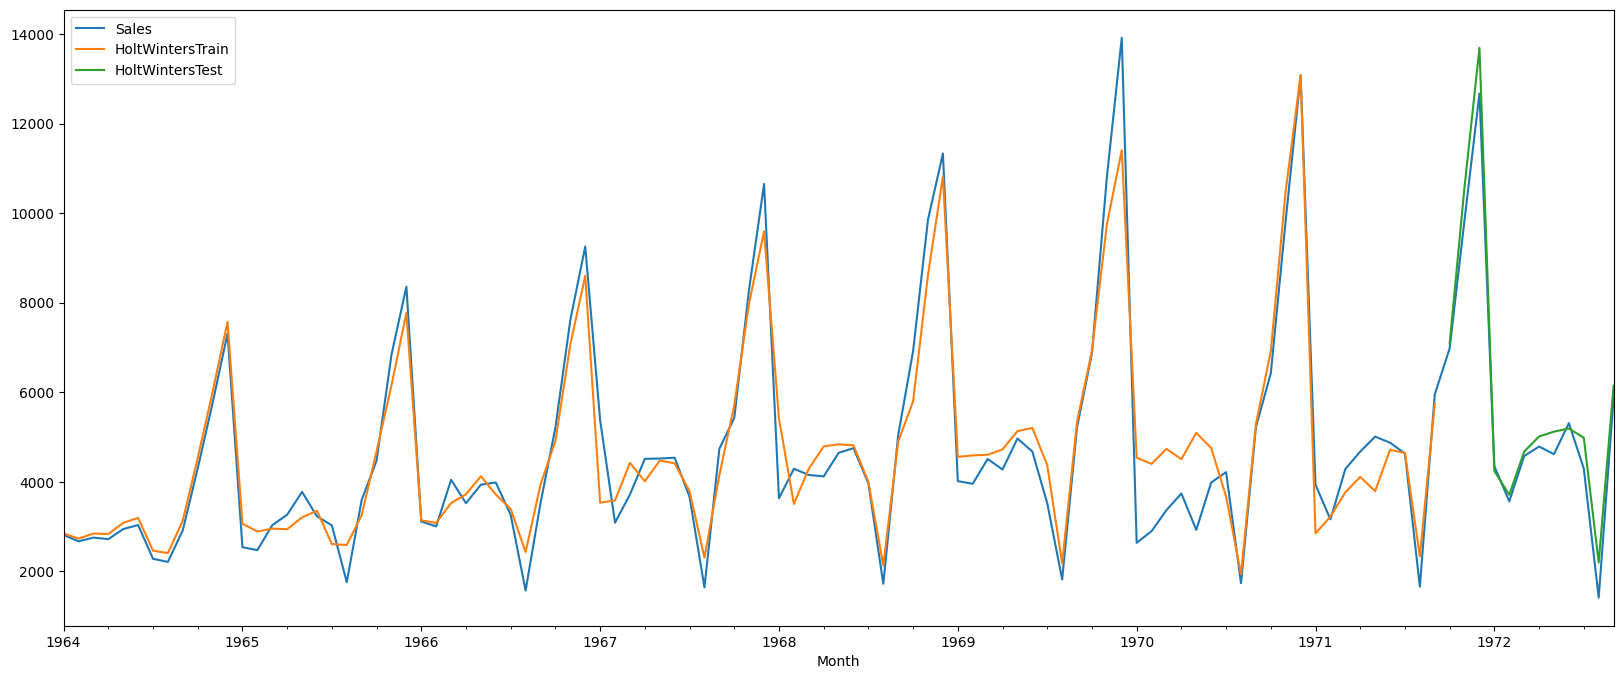

In [ ]:
df[['Sales','HoltWintersTrain','HoltWintersTest']].plot(figsize=(20,8))

In [ ]:
r2_score(train['Sales'],res_hw.fittedvalues)

0.9169984903500262

In [ ]:
r2_score(test['Sales'],res_hw.forecast(Ntest))

0.9680340910154467

##Optimized

In [ ]:
df= pd.read_csv('/content/perrin-freres-monthly-champagne.csv', index_col= 'Month', skipfooter=2, parse_dates=True )

<ipython-input-104-52f12d5683ab>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df= pd.read_csv('/content/perrin-freres-monthly-champagne.csv', index_col= 'Month', skipfooter=2, parse_dates=True )


In [ ]:
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'Sales'}, inplace=True)

In [ ]:
print(df.isnull().sum())

Sales    0
dtype: int64


In [ ]:
#Assume the forecast horizon we care about is 12
#Validate over 10 steps
h = 12
steps = 10
Ntest = len(df)-h-steps+1 # infact validation period

In [ ]:
#Configuration hyperparameters to try
trend_type_list = ['add','mul']
seasonal_type_list = ['add','mul']
damped_trend_list = [True, False]
init_method_list = ['estimated','heuristic','legacy-heuristic']
use_boxcox_list = [True,False, 0]

In [ ]:
def walkforward(
    trend_type,
    seasonal_type,
    damped_trend,
    init_method,
    use_boxcox,
    debug=False):
  #store errors
  errors =[]
  seen_last = False
  steps_completed =0

  for end_of_train in range(Ntest,len(df)-h+1):
    #we dont have to manually add the data to our dataset
    #just index it at the right points - this is a view not a copy
    #so it doesnt take up any extra space or computation
    train = df.iloc[:end_of_train]
    test = df.iloc[end_of_train:end_of_train+h]

    if test.index[-1] == df.index[-1]:
      seen_last = True

    steps_completed += 1

    hw = ExponentialSmoothing(train['Sales'],
                              initialization_method = init_method,
                              trend = trend_type,
                              damped_trend = damped_trend,
                              seasonal = seasonal_type,
                              seasonal_periods=12,
                              use_boxcox= use_boxcox)
    res_hw = hw.fit()

    #compute error for the forescast horizon

    fcast=res_hw.forecast(h)
    error=mean_squared_error(test['Sales'],fcast)
    errors.append(error)

  if debug:
      print("seen_last:",seen_last)
      print('steps_completed:', steps_completed)

  return np.mean(errors)


In [ ]:
#test our function
#walkforward('add','add',False,'legacy-heuristic',0,debug=True)

In [ ]:
#iterate throught all possible options (i.e. grid search)

#tuple_of_option_lists = (
    #trend_type_list,
    #seasonal_type_list,
    #damped_trend_list,
    #init_method_list,
    #use_boxcox_list
#)
#for x in itertools.product(*tuple_of_option_lists):
  #print(x)

In [ ]:
#import numpy as np
#import itertools

#best_score = float('inf')
#best_options = None

# Supondo que 'tuple_of_option_lists' contém as opções que você deseja testar
#for x in itertools.product(*tuple_of_option_lists):
    #try:
        # Ajuste a função walkforward apenas na coluna 'Sales'
        #score = walkforward(*x)

        #if score < best_score:
            #print("Best score so far:", score)
            #best_score = score
            #best_options = x

    #except ValueError as e:
        # Trate a exceção quando a função walkforward retorna NaN
        #print(f"Ignorando combinação {x} devido a um valor NaN. Detalhes do erro: {e}")

#print("Melhor pontuação encontrada:", best_score)
#print("Melhores opções:", best_options)


In [ ]:
#print('best score:', best_score)

#trend_type, seasonal_type, damped_trend, init_method, use_boxcox = best_options
#print('trend_type', trend_type)
#print('seasonal_type', seasonal_type)
#print('damped_trend', damped_trend)
#print('init_method', init_method)
#print('use_boxcox', use_boxcox)

In [ ]:
#Sepaarate train and test
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [ ]:
#Boolean
train_idx = df.index <= train.index[-1]
test_idx = df.index <= test.index[-1]

In [ ]:
hw = ExponentialSmoothing(train['Sales'], damped_trend=False, use_boxcox=True, initialization_method = 'heuristic',trend='mul',seasonal='add',seasonal_periods=12)
res_hw = hw.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

In [ ]:
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest)

<Axes: xlabel='Month'>

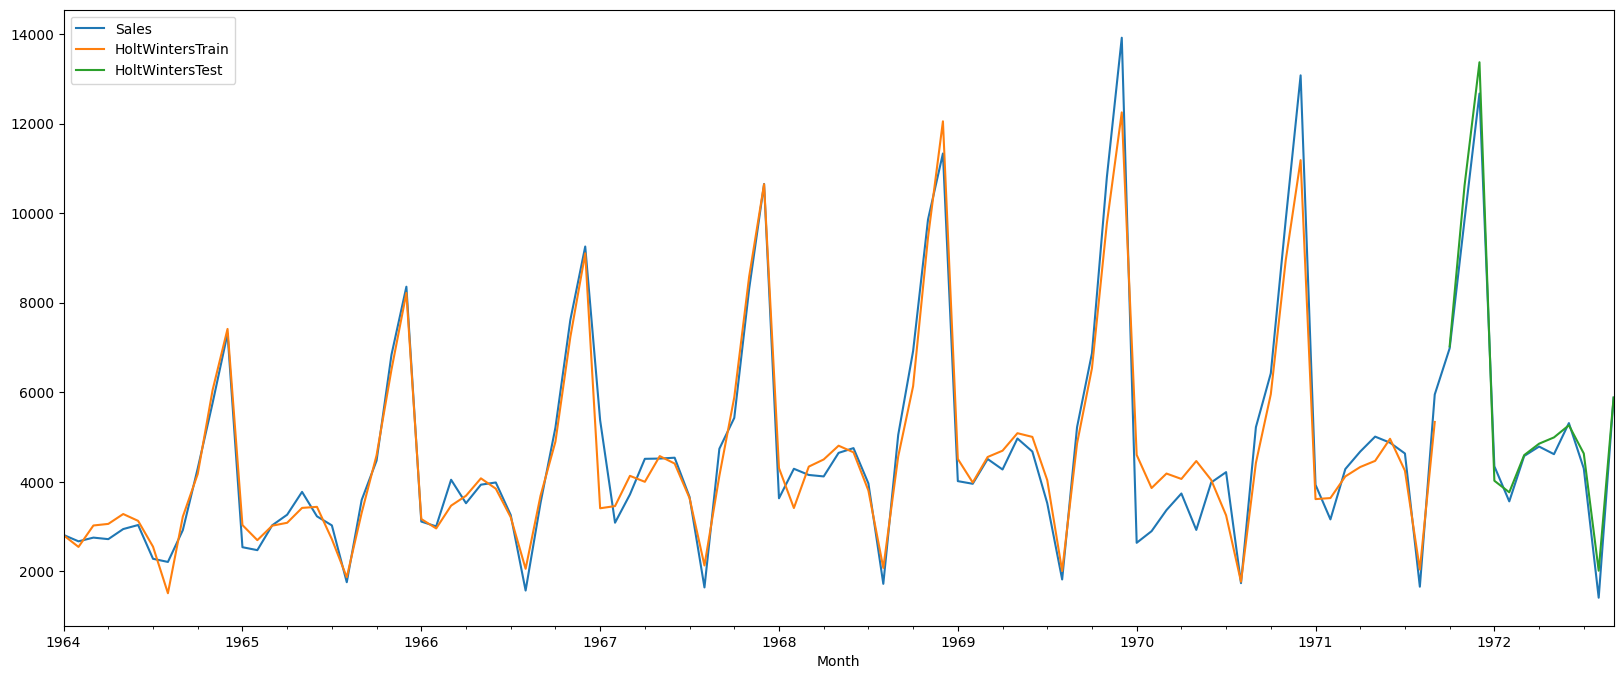

In [ ]:
df[['Sales','HoltWintersTrain','HoltWintersTest']].plot(figsize=(20,8))

In [ ]:
r2_score(train['Sales'],res_hw.fittedvalues)

0.9441195669913763

In [ ]:
r2_score(test['Sales'],res_hw.forecast(Ntest))

0.9811183790057086

#Stocks Predictions

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File ‘sp500sub.csv’ already there; not retrieving.



In [ ]:
!head /content/sp500sub.csv

Date,Open,High,Low,Close,Adj Close,Volume,Name
2010-01-04,9.220000267028807,9.510000228881836,9.170000076293944,9.5,9.5,1865400.0,INCY
2010-01-05,9.510000228881836,10.289999961853027,9.449999809265137,10.270000457763672,10.270000457763672,7608900.0,INCY
2010-01-06,10.380000114440918,11.09000015258789,10.350000381469727,11.0,11.0,8046700.0,INCY
2010-01-07,11.0,11.0600004196167,10.619999885559082,10.81999969482422,10.81999969482422,3680300.0,INCY
2010-01-08,10.81999969482422,11.0,10.75,10.9399995803833,10.9399995803833,1529300.0,INCY
2010-01-11,10.960000038146973,11.239999771118164,10.880000114440918,11.09000015258789,11.09000015258789,2280600.0,INCY
2010-01-12,10.989999771118164,11.0,10.34000015258789,10.359999656677246,10.359999656677246,4204600.0,INCY
2010-01-13,10.359999656677246,10.460000038146973,10.039999961853027,10.329999923706056,10.329999923706056,2134900.0,INCY
2010-01-14,10.3100004196167,10.390000343322754,10.079999923706056,10.15999984741211,10.15999984741211,2889600.0,INCY

In [ ]:
!tail /content/sp500sub.csv

2018-12-14,44.20000076293945,44.2400016784668,43.4900016784668,43.54999923706055,42.1451301574707,6502000.0,MDLZ
2018-12-17,43.68999862670898,43.77000045776367,42.599998474121094,42.810001373291016,41.42900466918945,7848900.0,MDLZ
2018-12-18,42.9900016784668,43.20000076293945,41.86000061035156,42.13999938964844,40.780616760253906,10439500.0,MDLZ
2018-12-19,42.4900016784668,42.65999984741211,41.2400016784668,41.40999984741211,40.07416534423828,11258800.0,MDLZ
2018-12-20,41.38999938964844,41.599998474121094,40.5099983215332,41.15999984741211,39.83223342895508,11418300.0,MDLZ
2018-12-21,41.0,41.900001525878906,40.36999893188477,40.68000030517578,39.367713928222656,17481400.0,MDLZ
2018-12-24,40.72000122070313,40.849998474121094,39.20000076293945,39.47999954223633,38.20642471313477,6641300.0,MDLZ
2018-12-26,39.61999893188477,40.02999877929688,38.77999877929688,40.0,38.70965194702149,8640100.0,MDLZ
2018-12-27,39.790000915527344,40.2599983215332,39.18999862670898,40.22999954223633,38.93222808

In [ ]:
df= pd.read_csv('/content/sp500sub.csv', index_col= 'Date', parse_dates=True )

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [ ]:
goog = df[df['Name'] == 'GOOG'][['Close']].copy() #Selecionando apenas as ações do google e o valor que fechou no dia

<Axes: xlabel='Date'>

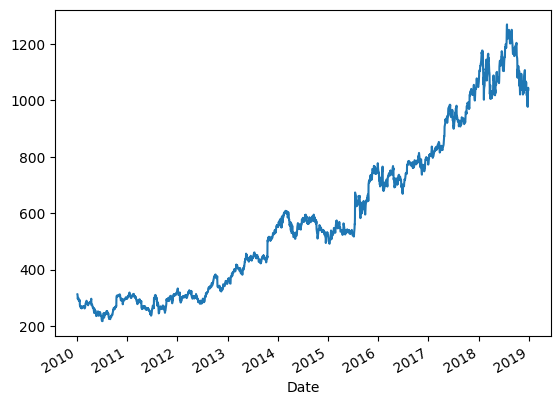

In [ ]:
goog['Close'].plot()

In [ ]:
goog['LogClose'] = np.log(goog['Close'])

<Axes: xlabel='Date'>

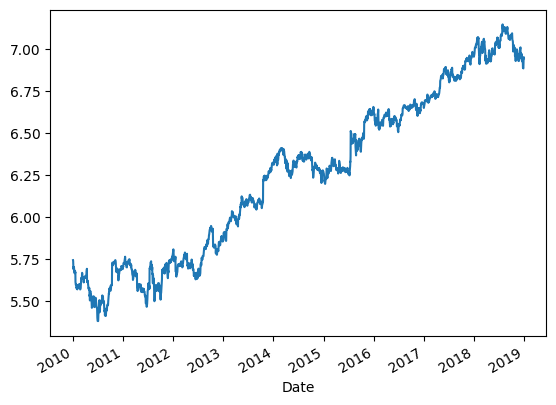

In [ ]:
goog['LogClose'].plot()

In [ ]:
Ntest=30 #days
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [ ]:
test.head()

,Close,LogClose
Date,,
2018-11-14,1043.660034,6.950489
2018-11-15,1064.709961,6.970458
2018-11-16,1061.489990,6.967429
2018-11-19,1020.000000,6.927558
2018-11-20,1025.760010,6.933189


In [ ]:
#Boolean
train_idx = goog.index <= train.index[-1]
test_idx = goog.index > train.index[-1]

In [ ]:
#Assume the forecast horizon we care about is 12
#Validate over 10 steps
#h = 30
#steps = 5
#Ntest = len(goog)-h-steps+1 # infact validation period

In [ ]:
def walkforward(
    trend_type,
    seasonal_type,
    damped_trend,
    init_method,
    use_boxcox,
    debug=False):
  #store errors
  errors =[]
  seen_last = False
  steps_completed =0

  for end_of_train in range(Ntest,len(goog)-h+1):
    #we dont have to manually add the data to our dataset
    #just index it at the right points - this is a view not a copy
    #so it doesnt take up any extra space or computation
    train = goog.iloc[:end_of_train]
    test = goog.iloc[end_of_train:end_of_train+h]

    if test.index[-1] == goog.index[-1]:
      seen_last = True

    steps_completed += 1

    hw = ExponentialSmoothing(train['LogClose'],
                              initialization_method = init_method,
                              trend = trend_type,
                              damped_trend = damped_trend,
                              seasonal = seasonal_type,
                              seasonal_periods=12,
                              use_boxcox= use_boxcox)
    res_hw = hw.fit()

    #compute error for the forescast horizon

    fcast=res_hw.forecast(h)
    error=mean_squared_error(test['LogClose'],fcast)
    errors.append(error)

  if debug:
      print("seen_last:",seen_last)
      print('steps_completed:', steps_completed)

  return np.mean(errors)


In [ ]:
#test our function
#walkforward('add','add',False,'legacy-heuristic',0,debug=True)

In [ ]:
#best_score = float('inf')
#best_options = None

# Supondo que 'tuple_of_option_lists' contém as opções que você deseja testar
#for x in itertools.product(*tuple_of_option_lists):
    #try:
        # Ajuste a função walkforward apenas na coluna 'Sales'
        #score = walkforward(*x)

       # if score < best_score:
            #print("Best score so far:", score)
            #best_score = score
           # best_options = x

   # except ValueError as e:
        # Trate a exceção quando a função walkforward retorna NaN
      #  print(f"Ignorando combinação {x} devido a um valor NaN. Detalhes do erro: {e}")

#print("Melhor pontuação encontrada:", best_score)
#print("Melhores opções:", best_options)

In [ ]:
#print('best score:', best_score)

#trend_type, seasonal_type, damped_trend, init_method, use_boxcox = best_options
#print('trend_type', trend_type)
#print('seasonal_type', seasonal_type)
#print('damped_trend', damped_trend)
#print('init_method', init_method)
#print('use_boxcox', use_boxcox)

In [ ]:
hw = ExponentialSmoothing(train['LogClose'], damped_trend=False, use_boxcox=0, initialization_method = 'heuristic',trend='add',seasonal=None,seasonal_periods=30)
res_hw = hw.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
goog.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

In [ ]:
goog.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest).to_numpy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

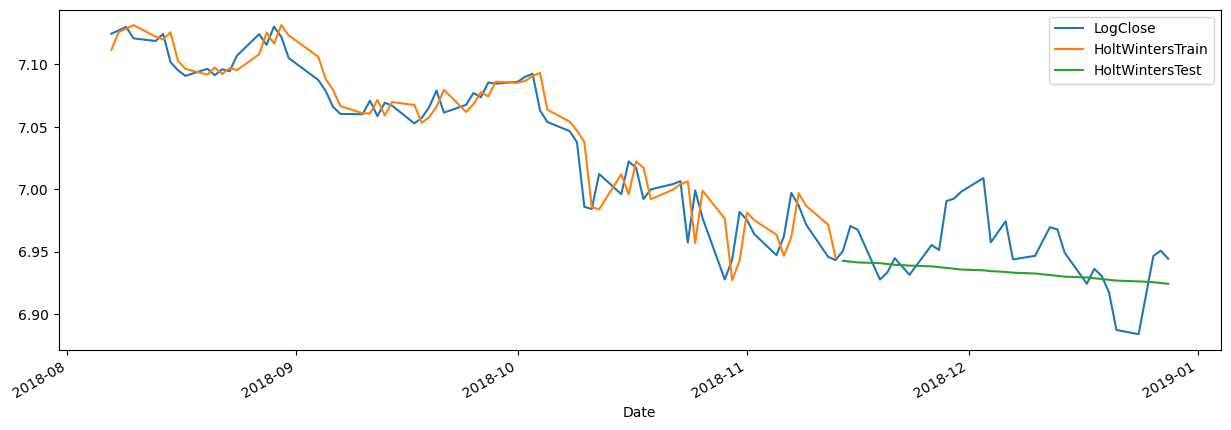

In [ ]:
cols = ['LogClose','HoltWintersTrain','HoltWintersTest']
goog.iloc[-100:][cols].plot(figsize=(15,5))

In [ ]:
goog.loc[test_idx,'Naive'] = train.iloc[-1]['LogClose']

<Axes: xlabel='Date'>

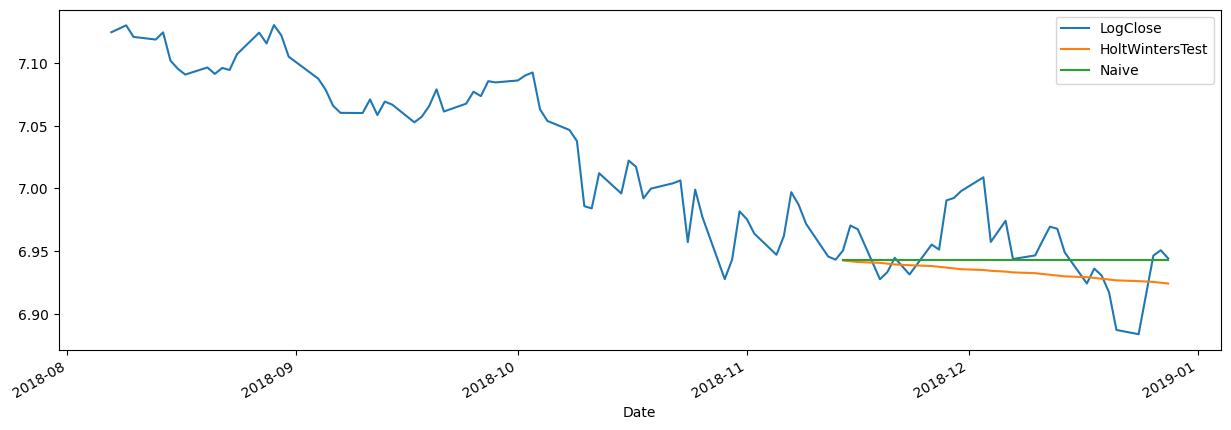

In [ ]:
goog.iloc[-100:][['LogClose','HoltWintersTest','Naive']].plot(figsize=(15,5))

In [ ]:
r2_score = (goog.loc[test_idx,'LogClose'], goog.loc[test_idx,'Naive'])


(Date
 2018-11-14    6.950489
 2018-11-15    6.970458
 2018-11-16    6.967429
 2018-11-19    6.927558
 2018-11-20    6.933189
 2018-11-21    6.944675
 2018-11-23    6.931355
 2018-11-26    6.955230
 2018-11-27    6.951207
 2018-11-28    6.990468
 2018-11-29    6.992372
 2018-11-30    6.997989
 2018-12-03    7.008894
 2018-12-04    6.957326
 2018-12-06    6.974226
 2018-12-07    6.943682
 2018-12-10    6.946543
 2018-12-11    6.958211
 2018-12-12    6.969490
 2018-12-13    6.967815
 2018-12-14    6.948993
 2018-12-17    6.924150
 2018-12-18    6.936061
 2018-12-19    6.930505
 2018-12-20    6.917121
 2018-12-21    6.887083
 2018-12-24    6.883688
 2018-12-26    6.946457
 2018-12-27    6.950700
 2018-12-28    6.944164
 Name: LogClose, dtype: float64,
 Date
 2018-11-14    6.943171
 2018-11-15    6.943171
 2018-11-16    6.943171
 2018-11-19    6.943171
 2018-11-20    6.943171
 2018-11-21    6.943171
 2018-11-23    6.943171
 2018-11-26    6.943171
 2018-11-27    6.943171
 2018-11-28    6.94

In [ ]:
r2_score = (goog.loc[test_idx,'LogClose'], goog.loc[test_idx,'HoltWintersTest'])
